In [5]:
import statistics
import numpy as np
from PIL import Image
import cv2
import pandas as pd
labeled_dir = str("/home/eric/Documents/cervicalResearchIIP/img_1006t/labeled")
# Dicecの計算
def cal_DiceMulitple(dir, input_name):
    # change the label count as your preference
    Dice = [0] * 11
    Count1 = [0] * 11 #予測結果の各ラベルの要素数
    Count2 = [0] * 11 #ラベル画像の
    Count3 = [0] * 11 #正解した画素数
    
    for index in range(len(input_name)):
        print('index = ', index)

        img1 = cv2.imread(dir + '/' + input_name[index] + ".png", cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(labeled_dir + '/' + input_name[index] + ".png", cv2.IMREAD_GRAYSCALE)
        #_, img2 = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY)
        print("予測画像:", dir  + '/' + input_name[index] + ".png")
        print("テストラベル:", labeled_dir + '/' + input_name[index] + ".png")
        unique_label1 = np.unique(img1)
        unique_label2 = np.unique(img2)
        # print(unique_label1)
        # print(unique_label2)
        # change the image array size to your need
        for n in range(256):
            for l in range(256):
                value1 = img1[n,l]
                # for index, uq_value in enumerate(unique_label1):
                #     if(value1 == uq_value):
                #         value1 = index

                Count1[value1] += 1

                value2 = img2[n,l]
                Count2[value2] += 1                    

                if(value1 == value2):
                    Count3[value1] += 1 
    for i in range(11):
        if(Count1[i]+Count2[i] != 0):
            Dice[i] = (2*Count3[i])/(Count1[i] + Count2[i])
        if(Count1[i]+Count2[i] == 0):
            print("")
            #print("4 label case:" + str(input_name[index]))
    Dice.append(statistics.mean(Dice[1:]))
    print('Count1 = ', Count1)
    print('Count2 = ', Count2)
    print('Count3 = ', Count3)
    print('Dice = ', Dice)
    #print(unique_label)

    return Dice


In [6]:
import os
# ファイル名の先頭部分（prefix）により自動的にファイル名を抽出するアルゴリズム。

""" 

Extracts filenames in directory if they start with the prefix input 


Args/Parameters:

    directory_path (string): The path of the dir (ex: /root/home/Documents/etc)
    
    prefix (string): Prefix of the file name (ex: 'Bo' is a prefix of 'Bone')

Returns:

    sorted_file_names (list of str): File names sorted in ascending order in the dir without extension ex: ['bone1', 'bone2', ...]

Raises:

    SomeError: ...

"""

def file_names_with_prefix(directory_path, prefix):

    # Initialize an empty list to store the file names without extensions
    file_names_without_extension = []

    # Loop through all files in the specified directory
    for filename in os.listdir(directory_path):
        #Checking if the file in loop exists in the directory_path not sure how is this necessary
        #??
        if os.path.isfile(os.path.join(directory_path, filename)):
            # Check if the file name starts with the specified prefix
            if filename.startswith(prefix):
                # Get the file name without extension
                name_without_extension, _ = os.path.splitext(filename)

                # Append the file name (without extension) to the list
                file_names_without_extension.append(name_without_extension)

    # Sort the list of file names without extensions in ascending order
    sorted_file_names = sorted(
        file_names_without_extension,
        key=lambda x: (x.split('-')[0], int(x.split('-')[1]))
    )  # Modify this part based on your file naming convention

    # Now you have a sorted list of file names with the specified prefix and without extensions
    return sorted_file_names


In [7]:

#searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/1-20250206-Unet-CRF-HP/fold1/crf")
#searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/2-20250205-MCunet-CRF-HP/fold1/crf")
#searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/3-20250208-TransUnet-CRF-HP/fold1/crf")

#unet
searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108")
#searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/MCU-108-21Dil (MRCNN)")
#mcunet

#searchdir2 = str("/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU10821-CustomLoss")
searchdir2 = str("/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss")
print(searchdir)


/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108


index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N1-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-1.png
image: N1-1 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N1-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-2.png
Count1 =  [59654, 890, 584, 751, 434, 568, 427, 539, 71, 1076, 542]
Count2 =  [59638, 982, 525, 602, 443, 582, 448, 802, 386, 706, 422]
Count3 =  [58976, 854, 515, 569, 394, 486, 385, 414, 9, 600, 79]
Dice =  [0.9887670589813231, 0.9123931623931624, 0.9287646528403968, 0.8410938654841094, 0.8985176738882554, 0.8452173913043478, 0.88, 0.6174496644295302, 0.03938730853391685, 0.6734006734006734, 0.16390041493775934, 0.6800124807212151]
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold1/crf/N1-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-

[ WARN:0@77.078] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N1-1.png'): can't open/read file: check file path/integrity
[ WARN:0@77.078] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold1/crf/N1-1.png'): can't open/read file: check file path/integrity
[ WARN:0@77.078] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N1-1.png'): can't open/read file: check file path/integrity


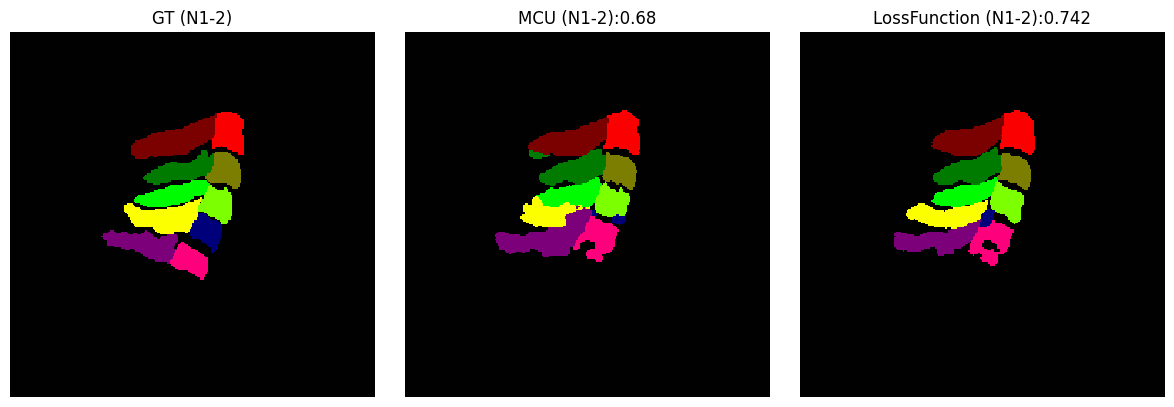

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N1-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-3.png
image: N1-3 not found


[ WARN:0@77.263] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N1-3.png'): can't open/read file: check file path/integrity
[ WARN:0@77.263] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold1/crf/N1-3.png'): can't open/read file: check file path/integrity
[ WARN:0@77.263] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N1-3.png'): can't open/read file: check file path/integrity


index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N1-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-4.png
Count1 =  [59594, 1218, 650, 835, 526, 782, 536, 464, 431, 462, 38]
Count2 =  [58722, 924, 620, 824, 522, 812, 456, 849, 470, 926, 411]
Count3 =  [58143, 911, 605, 794, 504, 740, 449, 440, 406, 167, 0]
Dice =  [0.9828425572196491, 0.8506069094304388, 0.952755905511811, 0.9572031344183243, 0.9618320610687023, 0.9284818067754078, 0.905241935483871, 0.6702208682406702, 0.9012208657047724, 0.24063400576368876, 0.0, 0.7368197492397687]
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold1/crf/N1-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-4.png
Count1 =  [59861, 1212, 651, 847, 493, 438, 485, 370, 34, 724, 421]
Count2 =  [58722, 924, 620, 824, 522, 812, 456, 849, 470, 926, 411]
Count3 =  [58226, 903, 606, 796, 484, 400, 438, 10, 18, 0, 1

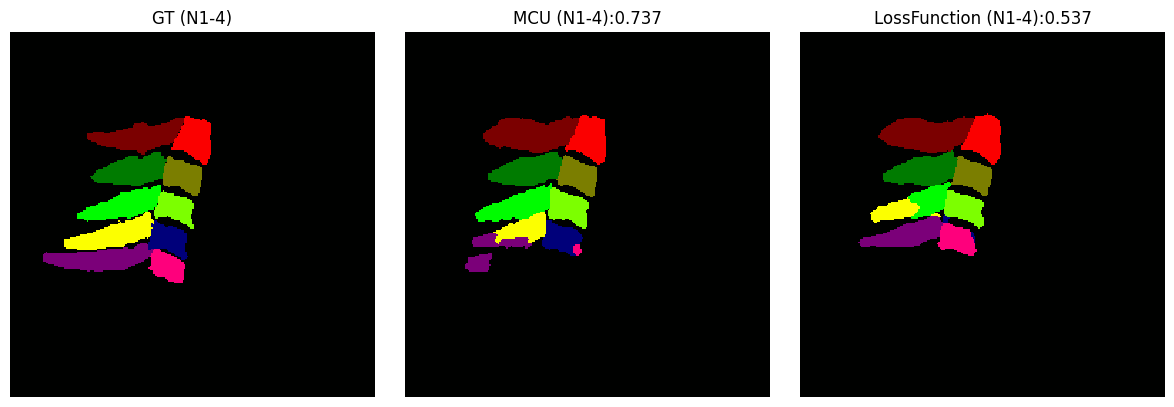

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N1-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-5.png
image: N1-5 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N1-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-6.png
Count1 =  [56269, 1465, 939, 939, 721, 886, 742, 980, 704, 1160, 731]
Count2 =  [56133, 1665, 975, 962, 669, 1005, 674, 1020, 641, 1054, 738]
Count3 =  [55505, 1448, 842, 885, 638, 833, 628, 835, 604, 990, 693]
Dice =  [0.9876158787210192, 0.9252396166134186, 0.8798328108672936, 0.9310889005786428, 0.9179856115107914, 0.8810153358011634, 0.8870056497175142, 0.835, 0.8981412639405204, 0.8943089430894309, 0.943498978897209, 0.8993117111015985]
index =  0


[ WARN:0@77.437] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N1-5.png'): can't open/read file: check file path/integrity
[ WARN:0@77.437] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold1/crf/N1-5.png'): can't open/read file: check file path/integrity
[ WARN:0@77.437] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N1-5.png'): can't open/read file: check file path/integrity


予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold1/crf/N1-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-6.png
Count1 =  [56351, 1480, 954, 994, 686, 862, 711, 905, 697, 1133, 763]
Count2 =  [56133, 1665, 975, 962, 669, 1005, 674, 1020, 641, 1054, 738]
Count3 =  [55472, 1443, 844, 927, 627, 812, 632, 767, 608, 976, 716]
Dice =  [0.9863091639699868, 0.9176470588235294, 0.8750648004147227, 0.9478527607361963, 0.9254612546125461, 0.8698446705945367, 0.9126353790613718, 0.7968831168831169, 0.9088191330343797, 0.8925468678555099, 0.9540306462358428, 0.9000785688251752]


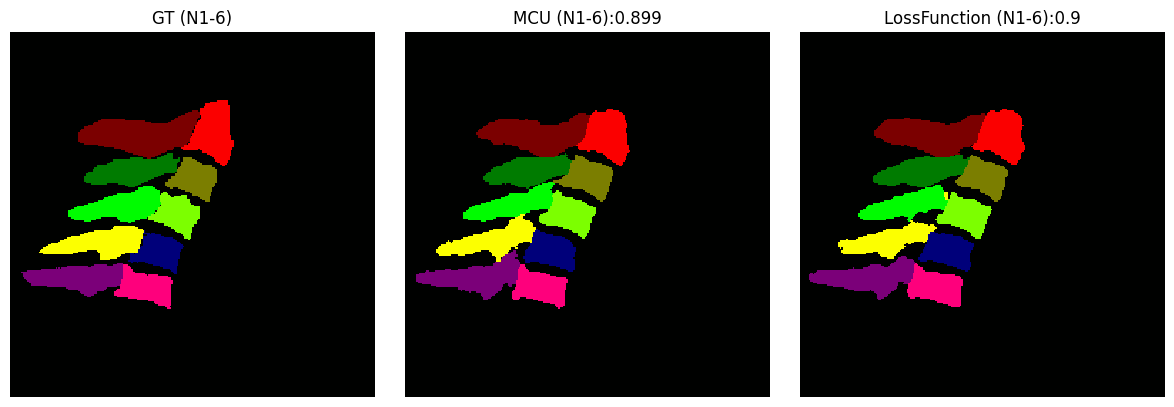

[ WARN:0@77.607] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N1-7.png'): can't open/read file: check file path/integrity
[ WARN:0@77.607] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold1/crf/N1-7.png'): can't open/read file: check file path/integrity
[ WARN:0@77.607] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N1-7.png'): can't open/read file: check file path/integrity
[ WARN:0@77.608] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N1-8.png'): can't open/read file: check file path/integrity
[ WARN:0@77.608] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold1/crf/N1-8.png'): can't open/read file: check file 

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N1-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-7.png
image: N1-7 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N1-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-8.png
image: N1-8 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N1-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-9.png
image: N1-9 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N1-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-10.png
image: N1-10 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N2-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-1.png
Count1 =  [56037, 1353, 

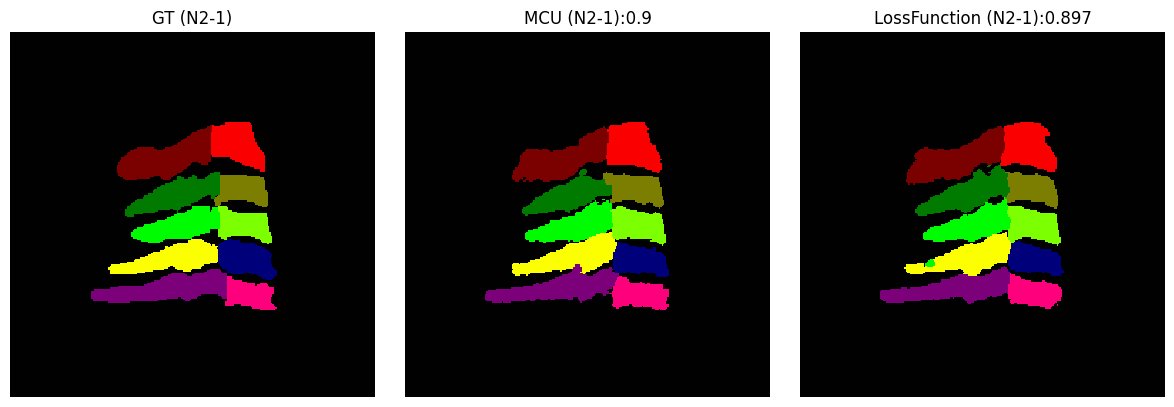

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N2-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-2.png
Count1 =  [57760, 1435, 873, 911, 600, 750, 582, 497, 364, 1255, 509]
Count2 =  [57404, 1611, 856, 890, 527, 820, 538, 748, 500, 1110, 532]
Count3 =  [56682, 1414, 825, 822, 511, 681, 512, 331, 323, 659, 333]
Dice =  [0.9843701156611441, 0.9284307288246881, 0.9543088490456911, 0.9128262076624097, 0.906832298136646, 0.867515923566879, 0.9142857142857143, 0.5317269076305221, 0.7476851851851852, 0.5572938689217759, 0.6397694524495677, 0.7960675135709079]
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold1/crf/N2-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-2.png
Count1 =  [57539, 1423, 854, 912, 582, 629, 573, 874, 465, 1081, 604]
Count2 =  [57404, 1611, 856, 890, 527, 820, 538, 748, 500, 1110, 532]
Count3 =  [56843, 1408, 817, 832, 5

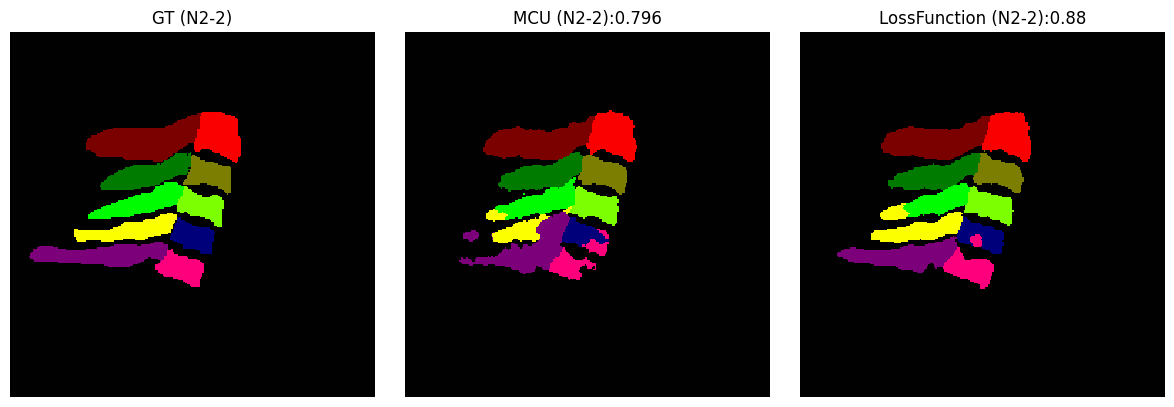

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N2-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-3.png
image: N2-3 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N2-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-4.png
image: N2-4 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N2-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-5.png
image: N2-5 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N2-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-6.png
image: N2-6 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N2-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-7.png
image: N2-7 not found
index

[ WARN:0@77.946] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N2-3.png'): can't open/read file: check file path/integrity
[ WARN:0@77.946] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold1/crf/N2-3.png'): can't open/read file: check file path/integrity
[ WARN:0@77.946] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N2-3.png'): can't open/read file: check file path/integrity
[ WARN:0@77.948] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N2-4.png'): can't open/read file: check file path/integrity
[ WARN:0@77.948] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold1/crf/N2-4.png'): can't open/read file: check file 

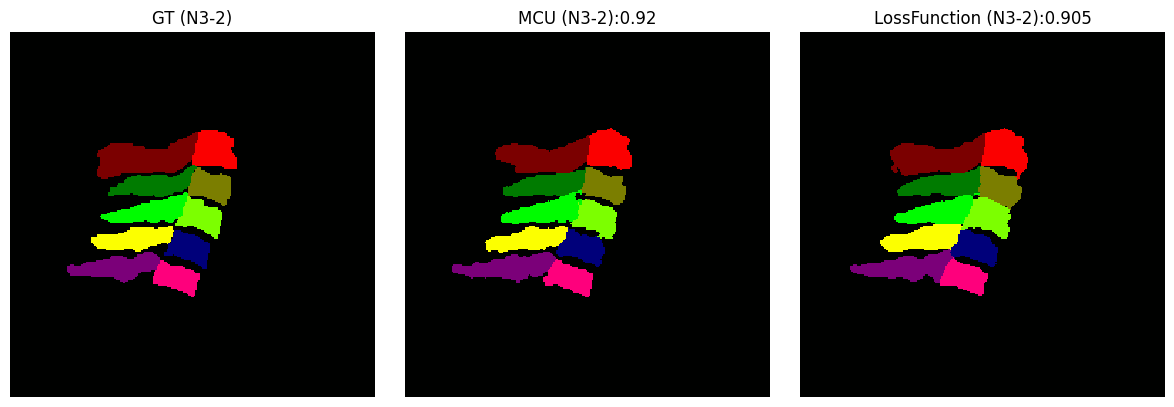

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N3-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-3.png
Count1 =  [59294, 903, 566, 759, 467, 565, 490, 741, 477, 842, 432]
Count2 =  [59591, 1014, 536, 714, 415, 581, 462, 575, 442, 807, 399]
Count3 =  [58941, 836, 518, 680, 406, 481, 450, 558, 426, 732, 379]
Dice =  [0.9915632754342432, 0.8721961398017736, 0.9401088929219601, 0.923285811269518, 0.9206349206349206, 0.8394415357766143, 0.9453781512605042, 0.8480243161094225, 0.9270946681175191, 0.8878107944208611, 0.9121540312876053, 0.9016129261600698]
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold1/crf/N3-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-3.png
Count1 =  [58939, 971, 592, 801, 471, 684, 493, 667, 520, 907, 491]
Count2 =  [59591, 1014, 536, 714, 415, 581, 462, 575, 442, 807, 399]
Count3 =  [58647, 882, 474, 691, 402, 565

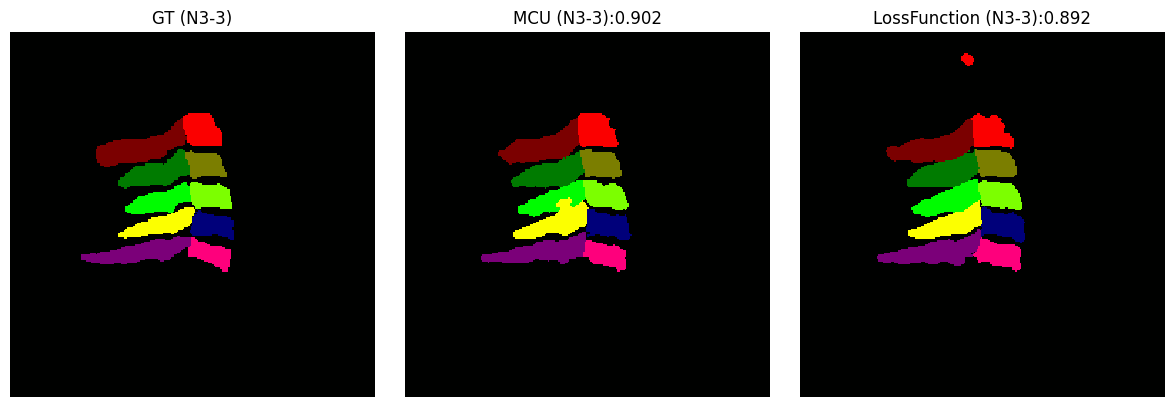

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N3-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-4.png
image: N3-4 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N3-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-5.png
image: N3-5 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N3-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-6.png
image: N3-6 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N3-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-7.png
image: N3-7 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N3-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-8.png
image: N3-8 not found
index

[ WARN:0@78.308] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N3-4.png'): can't open/read file: check file path/integrity
[ WARN:0@78.308] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold1/crf/N3-4.png'): can't open/read file: check file path/integrity
[ WARN:0@78.308] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N3-4.png'): can't open/read file: check file path/integrity
[ WARN:0@78.309] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N3-5.png'): can't open/read file: check file path/integrity
[ WARN:0@78.309] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold1/crf/N3-5.png'): can't open/read file: check file 

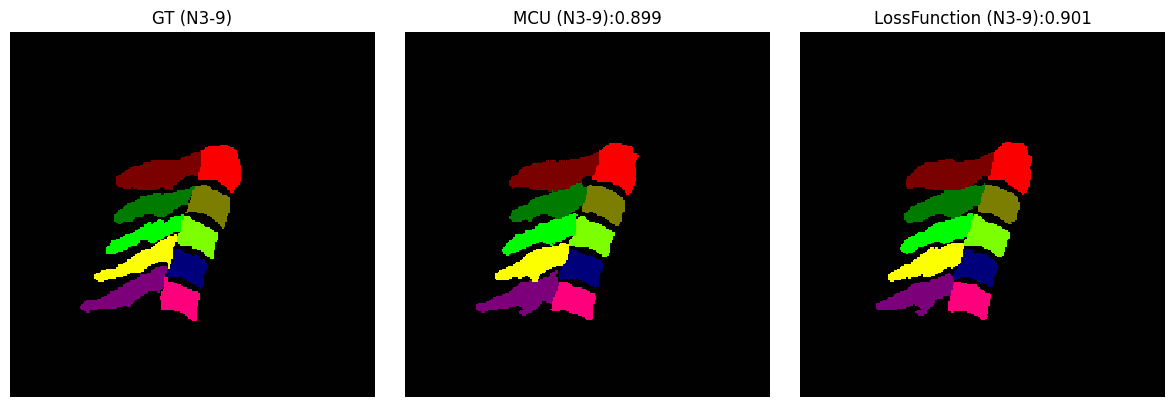

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N3-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-10.png
image: N3-10 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N4-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-1.png


[ WARN:0@78.496] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N3-10.png'): can't open/read file: check file path/integrity
[ WARN:0@78.496] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold1/crf/N3-10.png'): can't open/read file: check file path/integrity
[ WARN:0@78.497] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N3-10.png'): can't open/read file: check file path/integrity


Count1 =  [57514, 1121, 725, 971, 679, 946, 466, 923, 503, 1182, 506]
Count2 =  [57350, 1250, 723, 987, 609, 944, 596, 855, 497, 1212, 513]
Count3 =  [56854, 1073, 666, 872, 554, 894, 435, 807, 475, 1117, 476]
Dice =  [0.9899359242234295, 0.9051033319274567, 0.919889502762431, 0.8907048008171604, 0.860248447204969, 0.946031746031746, 0.8192090395480226, 0.9077615298087739, 0.95, 0.9331662489557226, 0.9342492639842983, 0.906636391104058]
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold1/crf/N4-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-1.png
Count1 =  [57333, 1235, 756, 979, 575, 917, 570, 901, 546, 1196, 528]
Count2 =  [57350, 1250, 723, 987, 609, 944, 596, 855, 497, 1212, 513]
Count3 =  [56810, 1144, 684, 913, 550, 861, 544, 804, 488, 1130, 485]
Dice =  [0.9907309714604605, 0.9207243460764587, 0.9249492900608519, 0.9287894201424212, 0.9290540540540541, 0.9253089736700698, 0.9331046312178388, 0.915717

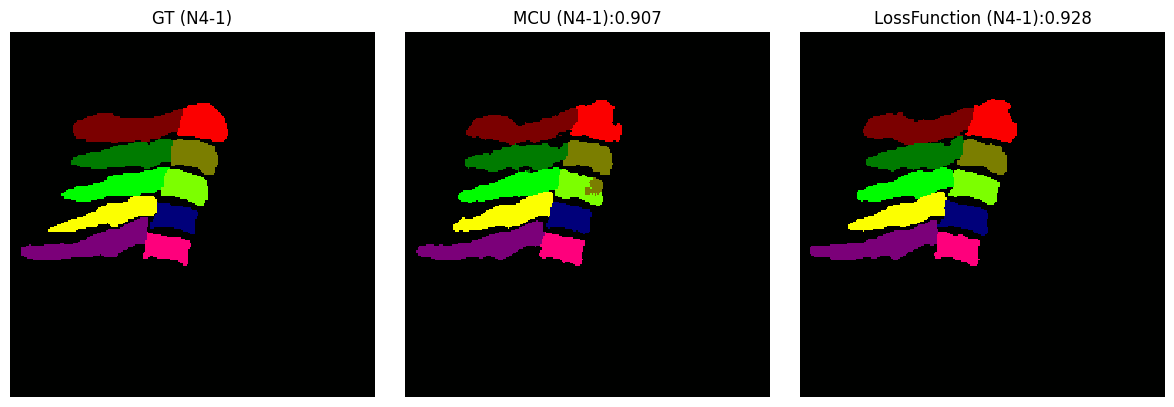

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N4-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-2.png
image: N4-2 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N4-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-3.png
image: N4-3 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N4-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-4.png
image: N4-4 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N4-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-5.png
image: N4-5 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N4-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-6.png
Count1 =  [59723, 899, 582,

[ WARN:0@78.758] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N4-2.png'): can't open/read file: check file path/integrity
[ WARN:0@78.758] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold1/crf/N4-2.png'): can't open/read file: check file path/integrity
[ WARN:0@78.758] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N4-2.png'): can't open/read file: check file path/integrity
[ WARN:0@78.759] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N4-3.png'): can't open/read file: check file path/integrity
[ WARN:0@78.759] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold1/crf/N4-3.png'): can't open/read file: check file 

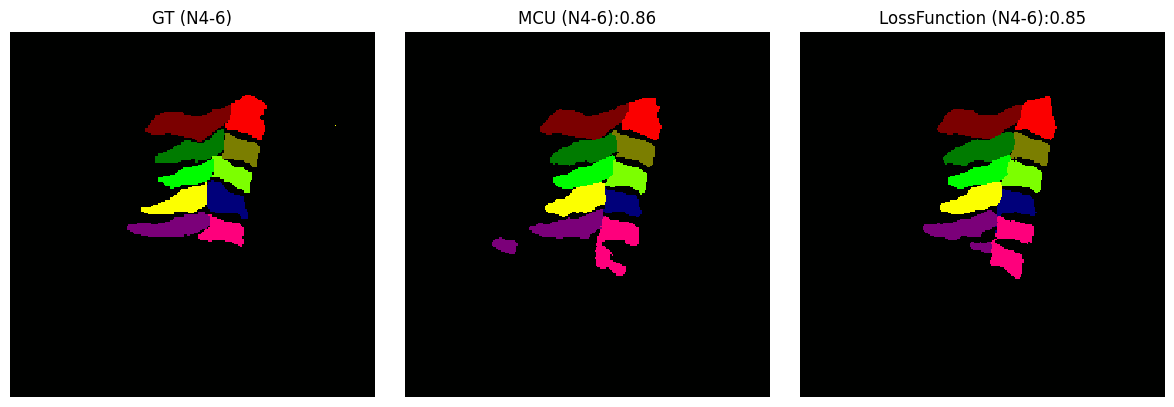

[ WARN:0@78.932] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N4-7.png'): can't open/read file: check file path/integrity
[ WARN:0@78.932] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold1/crf/N4-7.png'): can't open/read file: check file path/integrity
[ WARN:0@78.932] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N4-7.png'): can't open/read file: check file path/integrity
[ WARN:0@78.933] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N4-8.png'): can't open/read file: check file path/integrity
[ WARN:0@78.933] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold1/crf/N4-8.png'): can't open/read file: check file 

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N4-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-7.png
image: N4-7 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N4-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-8.png
image: N4-8 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N4-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-9.png
image: N4-9 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N4-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-10.png
image: N4-10 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N5-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-1.png
Count1 =  [59968, 812, 6

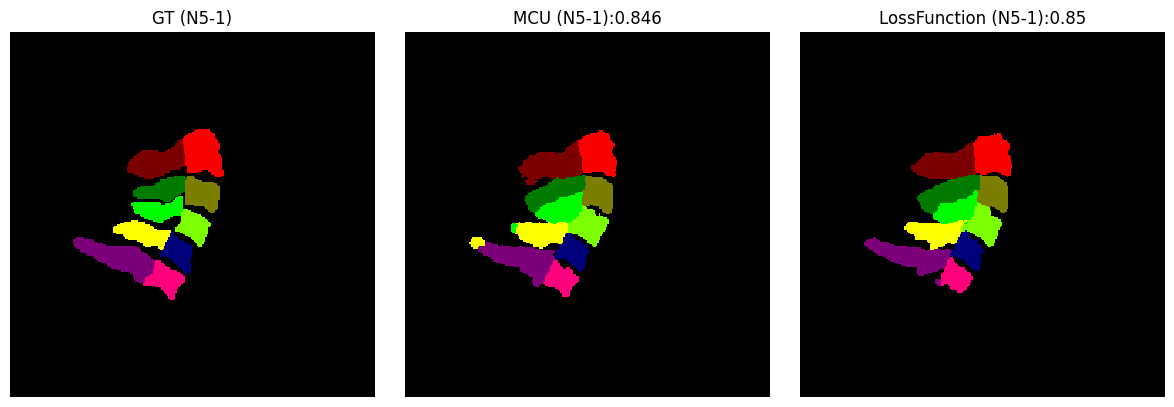

[ WARN:0@79.113] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N5-2.png'): can't open/read file: check file path/integrity
[ WARN:0@79.113] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold1/crf/N5-2.png'): can't open/read file: check file path/integrity
[ WARN:0@79.113] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N5-2.png'): can't open/read file: check file path/integrity
[ WARN:0@79.114] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N5-3.png'): can't open/read file: check file path/integrity
[ WARN:0@79.114] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold1/crf/N5-3.png'): can't open/read file: check file 

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N5-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-2.png
image: N5-2 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N5-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-3.png
image: N5-3 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N5-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-4.png
image: N5-4 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N5-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-5.png
image: N5-5 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N5-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-6.png
Count1 =  [59142, 953, 462,

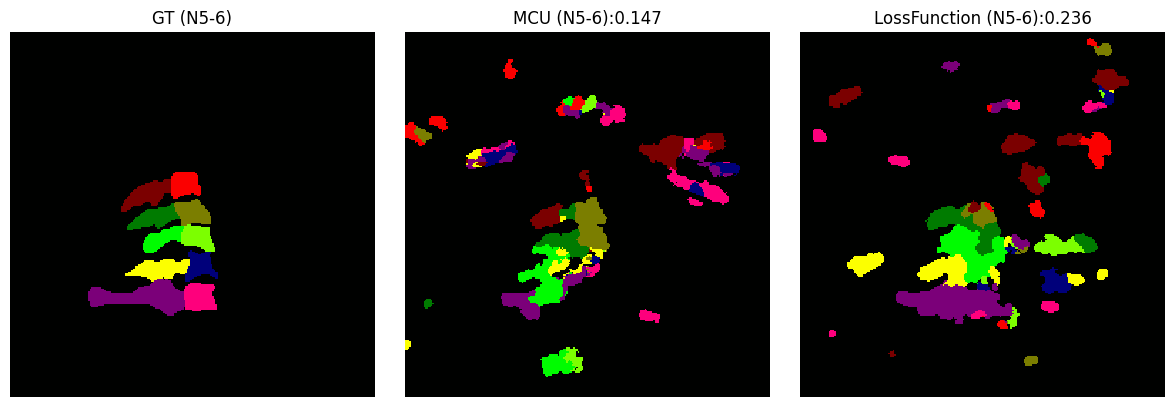

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N5-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-7.png
image: N5-7 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N5-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-8.png
image: N5-8 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N5-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-9.png
image: N5-9 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N5-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-10.png
image: N5-10 not found


[ WARN:0@79.285] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-7.png'): can't open/read file: check file path/integrity
[ WARN:0@79.285] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N5-7.png'): can't open/read file: check file path/integrity
[ WARN:0@79.285] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss/fold1/crf/N5-7.png'): can't open/read file: check file path/integrity
[ WARN:0@79.285] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108/fold1/crf/N5-7.png'): can't open/read file: check file path/integrity
[ WARN:0@79.286] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-7.png'): can't open/read file: check file path/integrity
[ WARN:0@79.286] global loadsave

In [8]:

fold = "fold1"
imgs_name = []
for i in range(5):
    for j in range (10):
        imgs_name.append(f"N{i+1}-{j+1}")

searchdir =  searchdir + "/" + fold + "/crf"
searchdir2 = searchdir2 + "/"  + fold + "/crf"
    

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
for img_name in imgs_name:
    try:
        img_label = cv2.imread(labeled_dir + "/" + img_name + ".png", cv2.IMREAD_GRAYSCALE) 
        img = cv2.imread(searchdir + "/" + img_name + ".png", cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(searchdir2 + "/" + img_name + ".png", cv2.IMREAD_GRAYSCALE)
        
        
        Dice1 = cal_DiceMulitple(searchdir, [img_name])
        df = pd.DataFrame(Dice1)
        df = df.T

        Dice2 = cal_DiceMulitple(searchdir2, [img_name])
        df = pd.DataFrame(Dice2)
        df = df.T
        
        
        

        fig, axes = plt.subplots(1, 3, figsize=(12, 4)) # figsize=(width, height) in inches
        colors = ['#000100', '#7B0000', '#FB0000', '#007B00', '#7B7E00', '#00FC00', '#7CFF00', '#FCFF00', '#00007A', '#7B0079', '#FE007C']
        cmap = ListedColormap(colors[:11])
        
        # 1. Plot the first image
        axes[0].imshow(img_label, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')
        axes[0].set_title(f'GT ({img_name})') # Caption for the first plot
        axes[0].axis('off') # Hide axis

        # 2. Plot the first image
        axes[1].imshow(img, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')
        axes[1].set_title(f'MCU ({img_name}):{np.round(Dice1[-1], 3)}') # Caption for the first plot
        axes[1].axis('off') # Hide axis

        # 3. Plot the second image
        axes[2].imshow(img2, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')
        axes[2].set_title(f'LossFunction ({img_name}):{np.round(Dice2[-1], 3)}') # Caption for the second plot
        axes[2].axis('off') # Hide axis

        # 5. Adjust layout to prevent titles from overlapping and display the plot
        plt.tight_layout()
        plt.show()
    except:
        print(f"image: {img_name} not found")